<a href="https://colab.research.google.com/github/Fredrick-Sam-Nilesh/datascience/blob/main/cohort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('/content/drive/MyDrive/cohorts.csv')

In [48]:
print(df.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [49]:
missing_values= df.isnull().sum()

In [50]:
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [51]:
df.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

In [52]:
#converting date column to date_time_column
df['Date'] = pd.to_datetime(df['Date'],format ='%d/%m/%Y')
df.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


In [53]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'
# Trend analysis for New and Returning Users
fig= go.Figure()
#Users- new & returning users
fig.add_trace(go.Scatter(x=df['Date'],y= df['New users'],mode='lines+markers',name='New users'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['Returning users'],mode='lines+markers',name='Returning users'))
#update layout
fig.update_layout(title='trends of New and Returning users over time ',
                  xaxis_title='Date', yaxis_title='Number of users')


In [54]:
#the trend of duration over time:
fig=px.line(data_frame=df,x='Date',y=['Duration Day 1','Duration Day 7'],markers= True, labels={'values':'Duration'})
fig.update_layout(title = ' trend of duration(Day 1 and Day 7)trend over time',xaxis_title='Date',yaxis_title='Duration',xaxis=dict(tickangle = -45))
fig.show()

<ipython-input-55-c4ec10479cfc>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



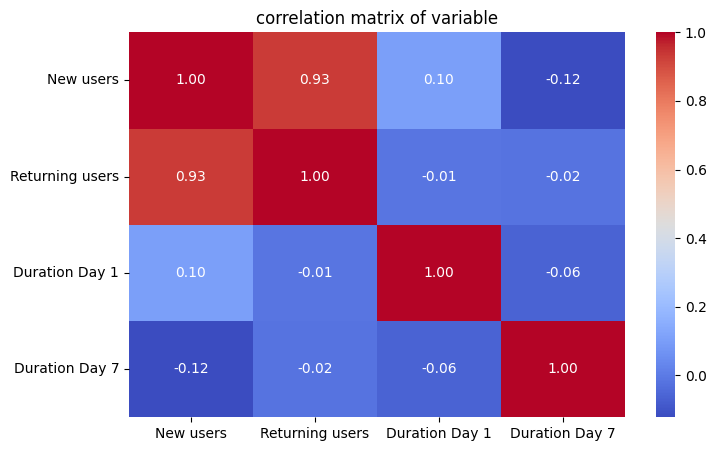

In [55]:
# Now, let’s have a look at the correlation between the variables:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation matrix
correlation_matrix = df.corr()
#ploting correlation matrix(heatmap):
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matrix of variable')
plt.show()


In [56]:
## Cohort Analysis: we’ll group the data by the week of the year to create cohorts.
# Then, for each cohort (week),
# we’ll calculate the average number of new and returning users,
# as well as the average of Duration Day 1 and Duration Day 7.
# Let’s start by grouping the data by week and calculating the necessary averages:
df['Week'] = df['Date'].dt.isocalendar().week
#calculating weekly average:
weekly_average = df.groupby('Week').agg({
    'New users':'mean',
    'Returning users':'mean',
    'Duration Day 1':'mean',
    'Duration Day 7':'mean'
}).reset_index()

print((weekly_average).head())


   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


In [57]:
#Now, let’s have a look at the weekly average of the new and returning users
#and the duration:
fig1=px.line(weekly_average,x='Week',y=['New users','Returning users'],markers=True,
             labels={'value': 'Average Number of Users'},title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Average Number of Users')
fig1.update_yaxes(title='Average Number of Users')

fig2=px.line(weekly_average,x='Week',y=['Duration Day 1','Duration Day 7'],markers=True,
             labels={'values':'Average Duration'},title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='week of the year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()

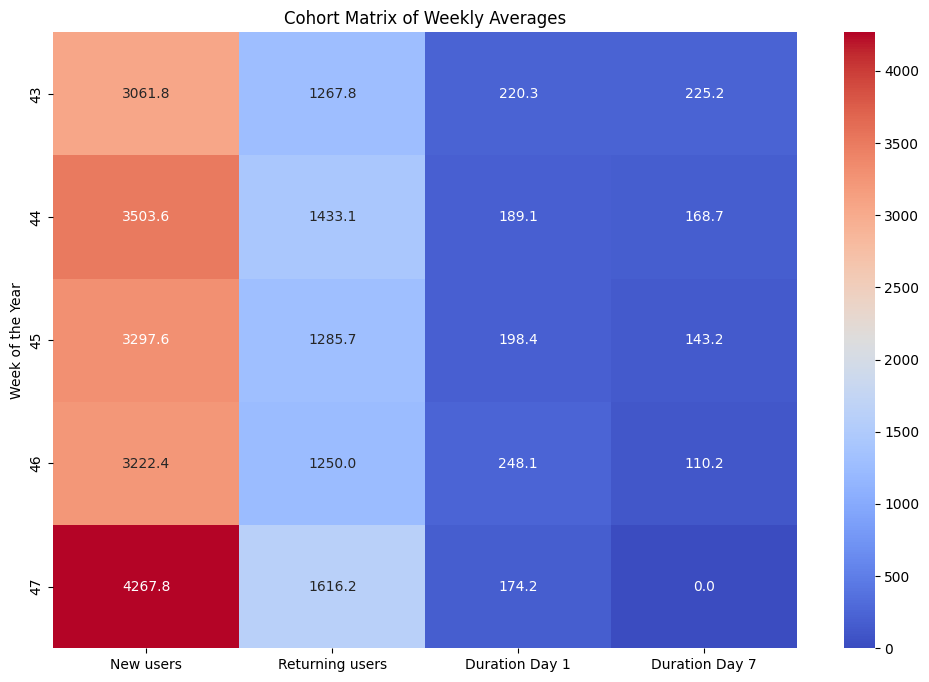

In [59]:
#Now, let’s create a cohort chart to understand the cohort matrix of weekly averages.
#In the cohort chart, each row will correspond to a week of the year,
#and each column will represent a different metric:

#Average duration on Day 7.
#Average number of returning users.
#Average duration on Day 1.
#Average duration on Day 7.
cohort_matrix = weekly_average.set_index('Week')
#ploting the cohot matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()